In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

## Graph size

In [12]:
data = """
-rw-r--r-- 1 fpautet cifs-seqbio  33448648 Jun  6 09:47 data/scerevisiae8_graphs/n1_k15.bin
-rw-r--r-- 1 fpautet cifs-seqbio   3192544 Jun 10 10:24 data/scerevisiae8_graphs/n1_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio   3088900 Jun  5 13:32 data/scerevisiae8_graphs/n1_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio   7603203 Jun 10 10:30 data/scerevisiae8_graphs/n2_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio   7675951 Jun  5 13:35 data/scerevisiae8_graphs/n2_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio   9108196 Jun 10 10:34 data/scerevisiae8_graphs/n3_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio   9367992 Jun  5 13:38 data/scerevisiae8_graphs/n3_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio   9124728 Jun 10 10:38 data/scerevisiae8_graphs/n4_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio   9391426 Jun  5 13:41 data/scerevisiae8_graphs/n4_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio   9511897 Jun 10 10:41 data/scerevisiae8_graphs/n5_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio   9828655 Jun  5 13:44 data/scerevisiae8_graphs/n5_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio  11913630 Jun 10 10:45 data/scerevisiae8_graphs/n6_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio  12485507 Jun  5 13:47 data/scerevisiae8_graphs/n6_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio  13283429 Jun 10 10:50 data/scerevisiae8_graphs/n7_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14047482 Jun  5 13:50 data/scerevisiae8_graphs/n7_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio  30199251 Jun  6 10:18 data/scerevisiae8_graphs/n8_k11.bin
-rw-r--r-- 1 fpautet cifs-seqbio 116348476 Jun  6 10:19 data/scerevisiae8_graphs/n8_k13.bin
-rw-r--r-- 1 fpautet cifs-seqbio  54574785 Jun  6 10:19 data/scerevisiae8_graphs/n8_k15.bin
-rw-r--r-- 1 fpautet cifs-seqbio  19332711 Jun  6 10:20 data/scerevisiae8_graphs/n8_k17.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14617736 Jun  6 10:20 data/scerevisiae8_graphs/n8_k19.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14168304 Jun  6 10:21 data/scerevisiae8_graphs/n8_k21.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14287721 Jun 10 10:16 data/scerevisiae8_graphs/n8_k23.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14481251 Jun  6 10:21 data/scerevisiae8_graphs/n8_k25.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14698916 Jun  6 10:21 data/scerevisiae8_graphs/n8_k27.bin
-rw-r--r-- 1 fpautet cifs-seqbio  14966920 Jun  6 10:21 data/scerevisiae8_graphs/n8_k29.bin
-rw-r--r-- 1 fpautet cifs-seqbio  15207741 Jun  6 10:22 data/scerevisiae8_graphs/n8_k31.bin
-rw-r--r-- 1 fpautet cifs-seqbio   1998897 Jun  6 10:18 data/scerevisiae8_graphs/n8_k9.bin
"""

rows = []
for line in data.strip().split('\n'):
    match = re.search(r'(\d+)\s+\S+\s+\S+\s+\S+\s+\S*n(\d+)_k(\d+)\.(bin|fna)', line)
    if match:
        size, n, k, filetype = match.groups()
        rows.append({'n': int(n), 'k': int(k), 'filetype': filetype, 'filesize': int(size)})

df_files = pd.DataFrame(rows)
df_files.sort_values(by=['k','n'], inplace=True)

In [13]:
data = """
Stats for graph "data/scerevisiae8_graphs/n8_k9.bin"Graph contains:        - 131072 nodes          - 524288 edges       Average node length: 9
Stats for graph "data/scerevisiae8_graphs/n8_k11.bin"Graph contains:       - 1917314 nodes         - 7231936 edges      Average node length: 11.00313720131392
Stats for graph "data/scerevisiae8_graphs/n8_k13.bin"Graph contains:       - 7125535 nodes         - 18026126 edges     Average node length: 13.31350937157701
Stats for graph "data/scerevisiae8_graphs/n8_k15.bin"Graph contains:       - 3099976 nodes         - 5806173 edges    Average node length: 18.41955099007218
Stats for graph "data/scerevisiae8_graphs/n8_k17.bin"Graph contains:       - 920750 nodes          - 1444726 edges    Average node length: 31.986577246809667
Stats for graph "data/scerevisiae8_graphs/n8_k19.bin"Graph contains:       - 618211 nodes          - 875467 edges       Average node length: 42.58056715263882
Stats for graph "data/scerevisiae8_graphs/n8_k21.bin"Graph contains:       - 570491 nodes          - 787782 edges       Average node length: 47.34073105447764
Stats for graph "data/scerevisiae8_graphs/n8_k23.bin"Graph contains:       - 556352 nodes          - 758179 edges       Average node length: 50.7239589324744
Stats for graph "data/scerevisiae8_graphs/n8_k25.bin"Graph contains:       - 546970 nodes          - 742457 edges     Average node length: 53.9012413843538
Stats for graph "data/scerevisiae8_graphs/n8_k27.bin"Graph contains:       - 539383 nodes          - 732449 edges       Average node length: 57.00501869728931
Stats for graph "data/scerevisiae8_graphs/n8_k29.bin"Graph contains:       - 534755 nodes          - 722579 edges       Average node length: 59.95306822750605
Stats for graph "data/scerevisiae8_graphs/n8_k31.bin"Graph contains:       - 529076 nodes          - 714204 edges     Average node length: 62.97546666263448

Stats for graph "data/scerevisiae8_graphs/n1_k31.bin"Graph contains:       - 10287 nodes           - 14507 edges      Average node length: 1149.0694079906677
Stats for graph "data/scerevisiae8_graphs/n2_k31.bin"Graph contains:       - 203686 nodes          - 273923 edges       Average node length: 98.73978574865234
Stats for graph "data/scerevisiae8_graphs/n3_k31.bin"Graph contains:       - 276739 nodes          - 372565 edges       Average node length: 83.40468817188759
Stats for graph "data/scerevisiae8_graphs/n4_k31.bin"Graph contains:       - 277685 nodes          - 373912 edges       Average node length: 83.28098744980824
Stats for graph "data/scerevisiae8_graphs/n5_k31.bin"Graph contains:       - 296590 nodes          - 399546 edges     Average node length: 80.55469166189015
Stats for graph "data/scerevisiae8_graphs/n6_k31.bin"Graph contains:       - 410826 nodes          - 553769 edges     Average node length: 69.56439709268645
Stats for graph "data/scerevisiae8_graphs/n7_k31.bin"Graph contains:       - 478605 nodes          - 645581 edges     Average node length: 65.40313828731418
Stats for graph "data/scerevisiae8_graphs/n8_k31.bin"Graph contains:       - 529076 nodes          - 714204 edges     Average node length: 62.97546666263448

Stats for graph "data/scerevisiae8_graphs/n1_k23.bin"Graph contains:	   - 17499 nodes	   - 26138 edges	Average node length: 677.7530716040917
Stats for graph "data/scerevisiae8_graphs/n2_k23.bin"Graph contains:	   - 229586 nodes	   - 312156 edges	Average node length: 80.46711036387237
Stats for graph "data/scerevisiae8_graphs/n3_k23.bin"Graph contains:	   - 303119 nodes	   - 412498 edges	Average node length: 68.19235019909672
Stats for graph "data/scerevisiae8_graphs/n4_k23.bin"Graph contains:	   - 303827 nodes	   - 413527 edges	Average node length: 68.12991603774516
Stats for graph "data/scerevisiae8_graphs/n5_k23.bin"Graph contains:	   - 322768 nodes	   - 439489 edges	Average node length: 65.87839562781936
Stats for graph "data/scerevisiae8_graphs/n6_k23.bin"Graph contains:	   - 439801 nodes	   - 598693 edges	Average node length: 56.35423293716931
Stats for graph "data/scerevisiae8_graphs/n7_k23.bin"Graph contains:	   - 507004 nodes	   - 690438 edges	Average node length: 52.799013420012464
Stats for graph "data/scerevisiae8_graphs/n8_k23.bin"Graph contains:	   - 556352 nodes	   - 758179 edges	Average node length: 50.7239589324744

"""

rows = []
for line in data.strip().split('\n'):
    r'(\d+)\s+\S+\s+\S+\s+\S+\s+\S*n(\d+)_k(\d+)\.(bin|fna)'
    match = re.search(r'n(\d+)_k(\d+)\.bin.*- (\d+) nodes.*- (\d+) edges.*Average node length: ([\d\.]+)', line)
    if match:
        n, k, nodes, edges, avg_length = match.groups()
        rows.append({'n': int(n), 'k': int(k), 'nodes': int(nodes), 'edges': int(edges), 'avg_length': float(avg_length)})
df_stats = pd.DataFrame(rows)
df_stats.sort_values(by=['k', 'n'], inplace=True)


In [14]:
df_merged = pd.merge(df_files, df_stats, on=['n', 'k'])

In [22]:
fs = 18

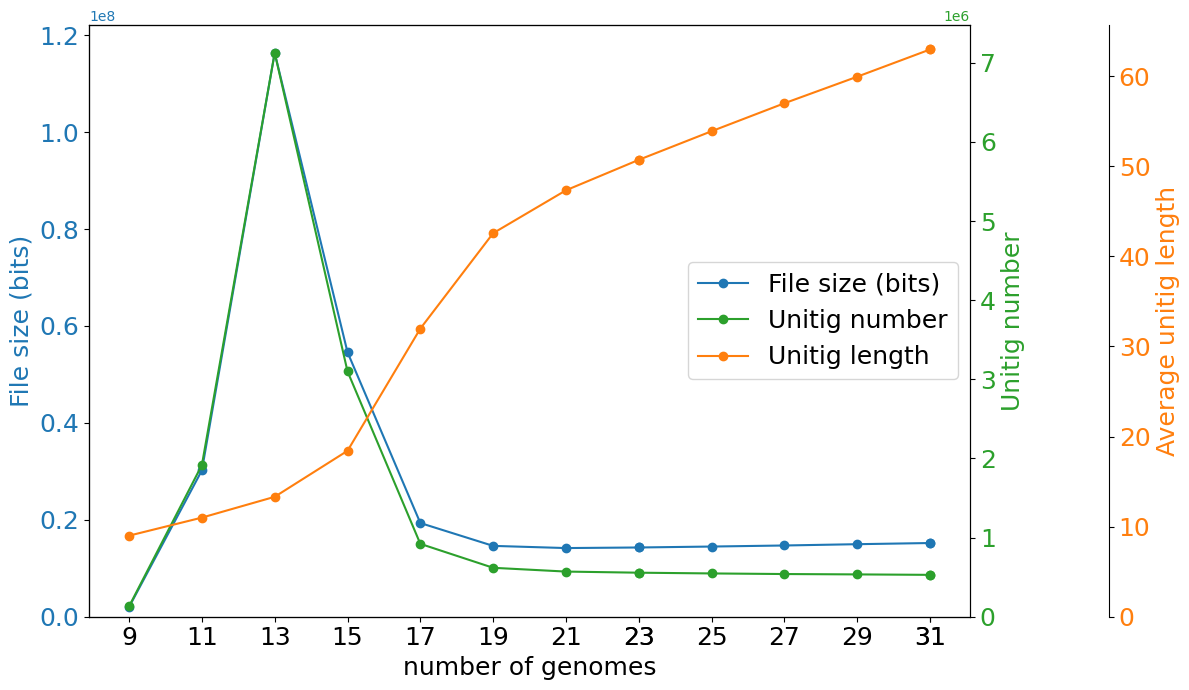

In [29]:
n = 8

df = df_merged[(df_merged['filetype'] == 'bin') & (df_merged['n'] == n)]
x = df['k']

fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 100))

# Plot data
line1 = ax1.plot(x, df['filesize'], marker='o', color='tab:blue', label='File size (bits)')
# line1b = ax3.plot(x,  df_stats['avg_length']*df_stats['nodes'], marker='o', color='green', label='sizes')
line2 = ax2.plot(x, df['nodes'], marker='o', color='tab:green', label='Unitig number')
line3 = ax3.plot(x, df['avg_length'], marker='o', color='tab:orange', label='Unitig length')

# Set labels and colors
ax1.set_xticks(x)
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0)
ax1.set_xlabel('number of genomes', fontsize=fs)

ax1.set_ylabel('File size (bits)', color='tab:blue', fontsize=fs)
ax2.set_ylabel('Unitig number', color='tab:green', fontsize=fs)
ax3.set_ylabel('Average unitig length', color='tab:orange', fontsize=fs)

# set tick color
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=fs)
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=fs)
ax3.tick_params(axis='y', labelcolor='tab:orange', labelsize=fs)
ax1.tick_params(axis='x', labelsize=fs)

# Create combined legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', fontsize=fs)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

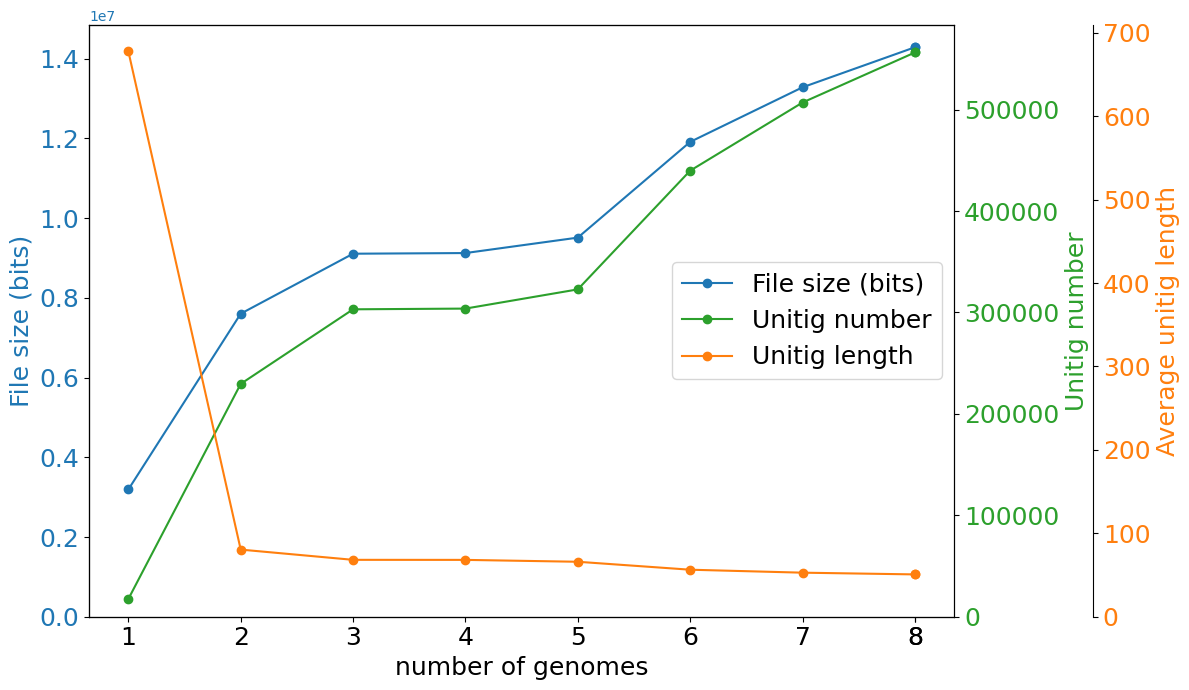

In [28]:
k = 23

df = df_merged[(df_merged['filetype'] == 'bin') & (df_merged['k'] == 23)]
x = df['n']

fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 100))

# Plot data
line1 = ax1.plot(x, df['filesize'], marker='o', color='tab:blue', label='File size (bits)')
# line1b = ax3.plot(x,  df_stats['avg_length']*df_stats['nodes'], marker='o', color='green', label='sizes')
line2 = ax2.plot(x, df['nodes'], marker='o', color='tab:green', label='Unitig number')
line3 = ax3.plot(x, df['avg_length'], marker='o', color='tab:orange', label='Unitig length')

# Set labels and colors
ax1.set_xticks(x)
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.set_ylim(bottom=0)
ax1.set_xlabel('number of genomes', fontsize=fs)

ax1.set_ylabel('File size (bits)', color='tab:blue', fontsize=fs)
ax2.set_ylabel('Unitig number', color='tab:green', fontsize=fs)
ax3.set_ylabel('Average unitig length', color='tab:orange', fontsize=fs)

# set tick color
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=fs)
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=fs)
ax3.tick_params(axis='y', labelcolor='tab:orange', labelsize=fs)
ax1.tick_params(axis='x', labelsize=fs)

# Create combined legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', fontsize=fs)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Shortest path length

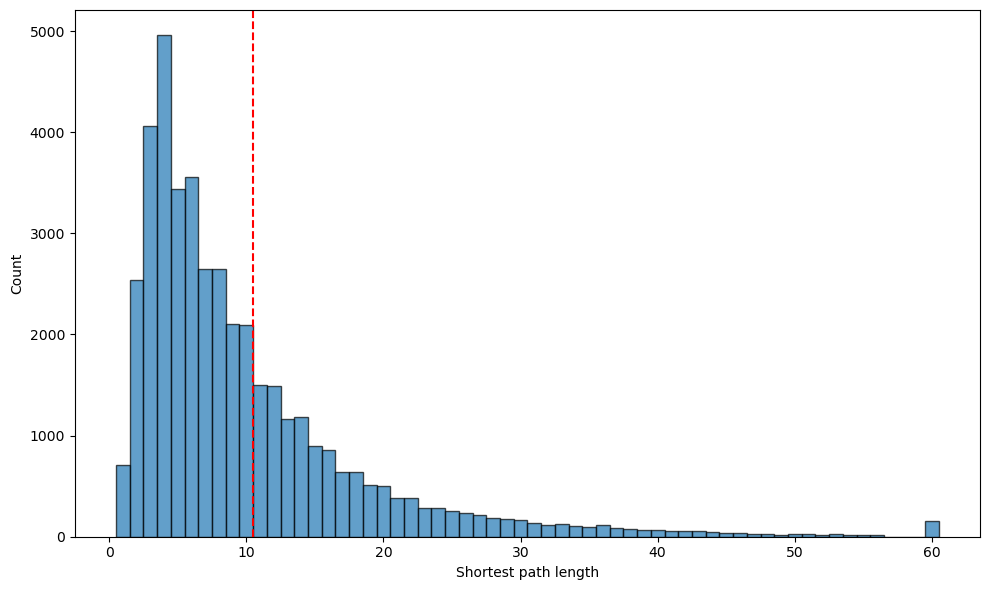

In [17]:
n = 8
k = 23
path = f"data/scerevisiae8_encoding/SP_n{n}_k{k}.txt"

with open(path) as f:
    sp_series = pd.Series([int(line.strip().split(":")[1]) for line in f if line.strip()])


bins = np.arange(0.5, sp_series.max() + 1.5, 1)
plt.figure(figsize=(10, 6))
plt.hist(sp_series, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Shortest path length')
plt.ylabel('Count')
plt.axvline(10.5, color='red', linestyle='--')
# plt.title('Distribution of the path length')

plt.tight_layout()
plt.show()


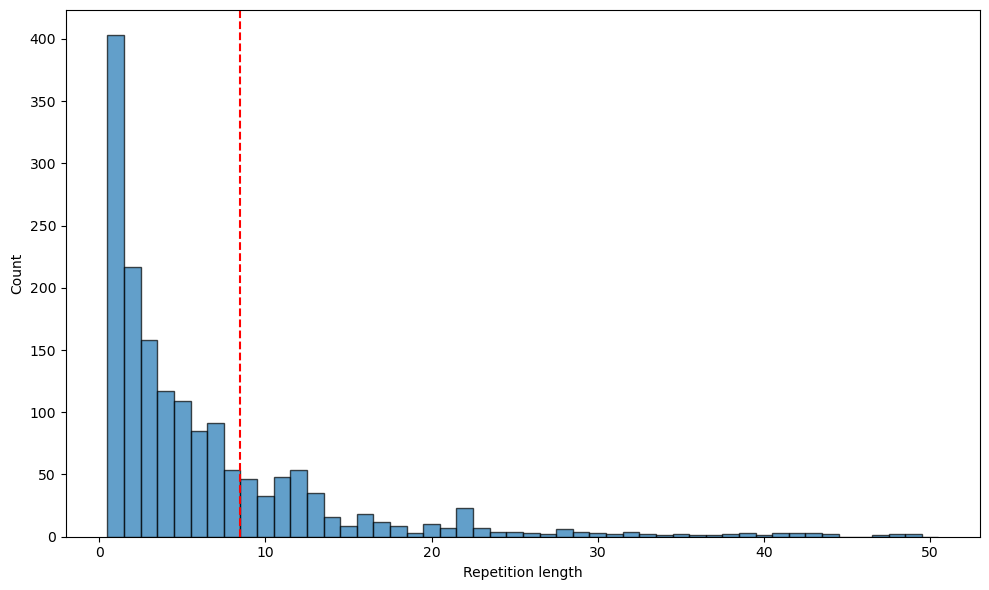

In [18]:
n = 8
k = 23
path = f"data/scerevisiae8_encoding/R_n{n}_k{k}.txt"

rows = []
with open(path) as f:
    for line in f:
        line = line.strip()
        if line.startswith("R:"):
            parts = line[2:].split("-")
            if len(parts) == 2:
                rep, offset = map(int, parts)
                if rep > 0:
                    rows.append({'rep': rep, 'offset': offset})

df_r = pd.DataFrame(rows)
df_r.sort_values(by='rep', inplace=True)
r_series = df_r['rep']

bins = np.arange(0.5, 50 + 1.5, 1)
plt.figure(figsize=(10, 6))
plt.hist(r_series, bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Repetition length')
plt.ylabel('Count')
plt.axvline(8.5, color='red', linestyle='--')
# plt.title('Distribution of the path length')

plt.tight_layout()
plt.show()

In [19]:
n = 8
k = 23
path = f"data/scerevisiae8_encoding/A_n{n}_k{k}.txt"

rows = []
with open(path) as f:
    for line in f:
        line = line.strip()
        if line.startswith("R:"):
            parts = line[2:].split("-")
            if len(parts) == 2:
                rep, offset = map(int, parts)
                if rep > 0:
                    rows.append({'type': 'R', 'length': rep})
        elif line.startswith("SP:"):
            length = int(line[3:])
            if length >= 8:
                rows.append({'type': 'SP', 'length': length})
            else:
                rows.append({'type': 'NN', 'length': length})

df = pd.DataFrame(rows)

In [20]:
df_res = df.groupby('type')['length'].agg(['sum', 'count', 'mean'])
cost_map = {'NN': 2, 'R': 16, 'SP': 20}
df_res['cost'] = df_res.index.map(cost_map).fillna(0) * df_res['count']
df_res.loc['NN', 'cost'] = 2 * df_res['sum']['NN']
df_res.loc['total'] = df_res.sum()

df_res['sum (%)'] = 100 * df_res['sum'] / df_res.loc['total', 'sum']
df_res['cost (%)'] = 100 * df_res['cost'] / df_res.loc['total', 'cost']

df_res

,sum,count,mean,cost,sum (%),cost (%)
type,,,,,,
NN,92772.0,21089.0,4.399071,185544.0,21.976595,31.445577
R,8494.0,479.0,17.732777,7664.0,2.012129,1.298877
SP,320874.0,19842.0,16.171454,396840.0,76.011276,67.255545
total,422140.0,41410.0,38.303302,590048.0,100.000000,100.000000
